# 👀 Multilayer perceptron (MLP)

In this notebook, we'll walk through the steps required to train your own multilayer perceptron on the CIFAR dataset

In [ ]:
import numpy as np
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "..", "..")))
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models, optimizers, utils, datasets

from notebooks.utils import display


## 0. Parameters <a name="parameters"></a>

In [14]:
NUM_CLASSES = 10

## 1. Prepare the Data <a name="prepare"></a>

In [15]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 163s 1us/step


In [16]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

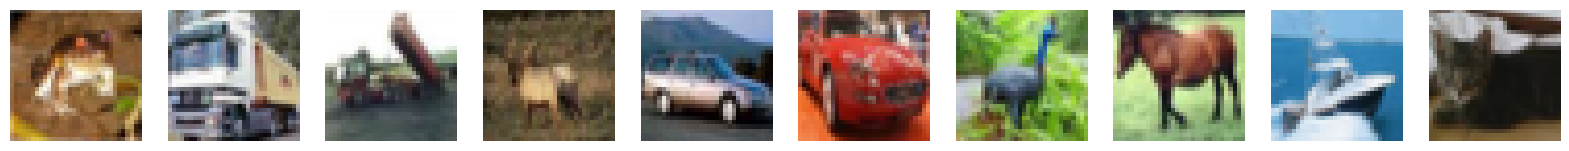

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [17]:
display(x_train[:10])
print(y_train[:10])

## 2. Build the model <a name="build"></a>

In [18]:
input_layer = layers.Input((32, 32, 3))

x = layers.Flatten()(input_layer)
x = layers.Dense(200, activation="relu")(x)
x = layers.Dense(150, activation="relu")(x)

output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = models.Model(input_layer, output_layer)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


## 3. Train the model <a name="train"></a>

In [19]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

In [20]:
model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 1.8440 - accuracy: 0.3366
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6608 - accuracy: 0.4054
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5781 - accuracy: 0.4378
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5251 - accuracy: 0.4560
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4875 - accuracy: 0.4715
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4570 - accuracy: 0.4810
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4299 - accuracy: 0.4921
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4067 - accuracy: 0.5007
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3835 - accuracy: 0.5090
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.366

## 4. Evaluation <a name="evaluate"></a>

In [21]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4396 - accuracy: 0.4898


[1.4395747184753418, 0.48980000615119934]

In [22]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 [==============================] - 1s 2ms/step


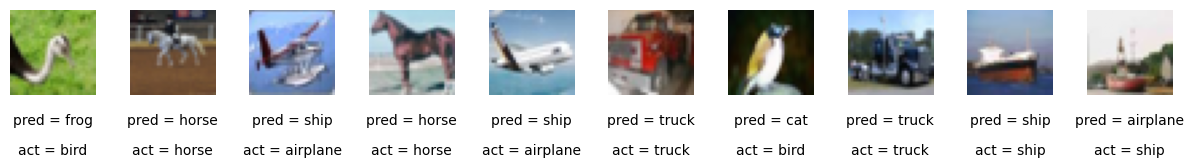

In [23]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)